In [1]:
 %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
 # create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
 # reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
 # View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
 # Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
sess = Session(bind=engine)

In [9]:
 # Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
recent_date = sess.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

In [10]:
# Perform a query to retrieve the data and precipitation scores
data = sess.query(Measurement.date, Measurement.prcp).filter(Measurement.date>(dt.date(2017,8,23) - dt.timedelta(days = 365))).order_by(Measurement.date).all()
data

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp = pd.DataFrame(data)
prcp.set_index('date')
prcp.head()

date  prcp
0  2016-08-24  0.08
1  2016-08-24  2.15
2  2016-08-24  2.28
3  2016-08-24   NaN
4  2016-08-24  1.22

Text(0, 0.5, 'Precipitation Amounts (In)')

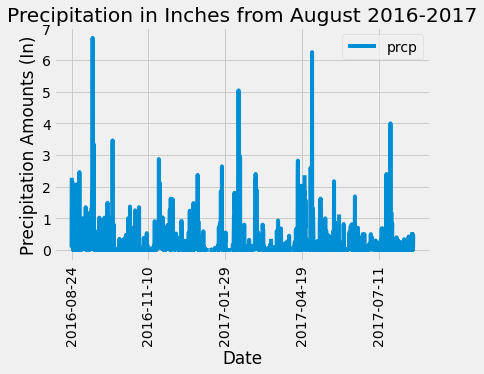

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp.plot('date', 'prcp')
plt.title("Precipitation in Inches from August 2016-2017")
plt.xlabel("Date")
plt.xticks(rotation = 'vertical')
plt.ylabel("Precipitation Amounts (In)")

In [13]:
 # Use Pandas to calcualte the summary statistics for the precipitation data
prcp.describe()

prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

In [16]:
stat = sess.query(Station).count()
stat

9

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active = (sess.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low = sess.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
low

[(54.0)]

In [30]:
high = sess.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
high

[(85.0)]

In [31]:
average = sess.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
average

[(71.66378066378067)]